pip install deep_translator

pip install googletrans

pip install googletrans==4.0.0-rc1

pip install googletrans --upgrade

pip install httpx==0.19.0

In [1]:
import pandas as pd 
import numpy as np 
from deep_translator import GoogleTranslator
import googletrans
from googletrans import Translator

In [2]:
df_1 = pd.read_csv("Traffic_Accidents_0.csv")

In [3]:
df_1.head()

,Rep Date,Rep Time,Rep Kind,City,Street,Rep Type,Reason,Surface,Weather,Age,No of Injured
0,1/1/2016,15:15,حادث سير بإصابات,ابوظبي,طريق أبوظبي - العين,تدهور,الإنحراف المفاجئ,جاف,صحو,54,4
1,1/23/2016,5:45,حادث سير بإصابات,ابوظبي,نقطة تفتيش الحدود الغربية,صدم عمودي,عدم إفساح الطريق / عدم إعطاء الألوية,جاف,صحو,47,1
2,1/31/2016,16:40,حادث سير بإصابات,ابوظبي,طريق طريف,صدم خلفي,عدم ترك مسافة كافية,جاف,صحو,59,1
3,2/10/2016,10:40,حادث سير بإصابات,ابوظبي,طريق أبوظبي - العين,صدم عمودي,الإنحراف المفاجئ,جاف,صحو,56,1
4,6/9/2016,9:10,حادث سير بإصابات,ابوظبي,نقطة تفتيش الحدود الغربية,صدم جانبي,عدم إفساح الطريق / عدم إعطاء الألوية,جاف,صحو,45,1


# Translating Arabic to English with the help of Google Translator library, but  intially I did some manual work for "Rep Type" columns with the help of replace function.

In [4]:
df_1['Rep Type'].replace('تدهور', 'Deterioration', inplace=True)

df_1['Rep Type'].replace('صدم جانبي', 'Side Impact', inplace=True)

df_1['Rep Type'].replace('صدم خلفي', 'Rear Collision', inplace=True)

df_1['Rep Type'].replace('صدم عمودي', 'Vertical impact', inplace=True)

df_1['Rep Type'].replace('دهس إنسان', 'Run over a person', inplace=True)

df_1['Rep Type'].replace('صدم جسم ثابت خارج الطريق', 'Hitting a stationary object off the road', inplace=True)

df_1['Rep Type'].replace('صدم متتالي', 'Consecutive shocks', inplace=True)


df_1['Rep Type'].replace('أخرى(حدد)', 'Other (specify)', inplace=True)

df_1['Rep Type'].replace('صدم متقابل', 'Opposite collision', inplace=True)

df_1['Rep Type'].replace('صدم جسم ثابت في الطريق', 'Hit a fixed object on the road', inplace=True)


df_1['Rep Type'].replace('صدم جسم غير ثابت في الطريق', 'Hitting an unstable object on the road', inplace=True)

df_1['Rep Type'].replace('صدم جسم غير ثابت خارج الطريق', 'Hitting a stationary object off the road', inplace=True)

df_1['Rep Type'].replace('صدم إثناء الدوران', 'Impact while turning', inplace=True)



df_1['Rep Type'].replace('غير معروف', 'Unknown', inplace=True)

df_1['Rep Type'].replace('سقوط', 'Shoulder Edge Dropp Off', inplace=True)

df_1['Rep Type'].replace('صدم حيوان', 'Hit an Animal', inplace=True)

df_1['Rep Type'].replace('إحتراق', 'Car Burning', inplace=True)

df_1['Rep Type'].replace('صدم غير متحرك', 'Bump on the road', inplace=True)

# Creating a dictionary and used google translator in built funtion to convert the rest of the columns which had arabic values in it. After the conversion I checked the (english) values in dictionary with respect to its (arabic) key and for that validation I went to online google and copy pasted the unique arabic values from each column and compared the english conversion of the value to the translation that python google translator did. 

In [5]:
#Creating a google translator object.
translate = Translator()

#Creating a dictionary 
Translation = {}

#selecting each column
for column in df_1[['Rep Kind', 'City', 'Street',
       'Reason', 'Surface', 'Weather',]]:
    unique_elements = df_1[column].unique()
    
    #going deep in each column 
    for element in unique_elements:
        #making dictionary with respect to each translation
        Translation[element] = translate.translate(element).text
        
print(Translation)

{'حادث سير بإصابات': 'Causal accident', 'حادث سير بدون إصابات': 'Traffic accident without injuries', 'ابوظبي': 'Abu Dhabi', 'منطقة الظفرة': 'Al Dhafra area', 'منطقة العين': 'Eye area', 'طريق أبوظبي - العين': 'Abu Dhabi Road - Al Ain', 'نقطة تفتيش الحدود الغربية': 'Western border checkpoint', 'طريق طريف': 'Tarif road', 'شارع الشيخ زايد - نفق الشيخ زايد': 'Sheikh Zayed Street - Sheikh Zayed Tunnel', 'شارع الشيخ مكتوم بن راشد': 'Sheikh Maktoum Bin Rashid Street', 'شارع زايد الأول(7)': 'Zayed First Street (7)', 'شارع المفرق الشوامخ': 'Mafraq Al -Shawamik Street', 'شارع الكورنيش باتجاه النادي البحري': 'Corniche Street towards the Maritime Club', 'IP52 تقاطع الكورنيش - راشد بن سعيد آل مكتوم': 'IP52 The Corniche intersection - Rashid bin Saeed Al Maktoum', 'IP2 تقاطع زايد الأول - خالد بن الوليد': 'IP2 Zayed first intersection - Khaled bin Al -Walid', 'شارع الشرقي (المرور) (4)': 'Eastern Street (Traffic) (4)', 'شارع راشد بن سعيد آل مكتوم (2)': 'Rashid bin Saeed Al Maktoum Street (2)', 'شارع ال

In [6]:
df_1.replace(Translation, inplace = True)
df_1.head()

,Rep Date,Rep Time,Rep Kind,City,Street,Rep Type,Reason,Surface,Weather,Age,No of Injured
0,1/1/2016,15:15,Causal accident,Abu Dhabi,Abu Dhabi Road - Al Ain,Deterioration,Sudden deviation,dry,Sahu,54,4
1,1/23/2016,5:45,Causal accident,Abu Dhabi,Western border checkpoint,Vertical impact,Not to make the road / not to give the brigades,dry,Sahu,47,1
2,1/31/2016,16:40,Causal accident,Abu Dhabi,Tarif road,Rear Collision,Not leaving enough distance,dry,Sahu,59,1
3,2/10/2016,10:40,Causal accident,Abu Dhabi,Abu Dhabi Road - Al Ain,Vertical impact,Sudden deviation,dry,Sahu,56,1
4,6/9/2016,9:10,Causal accident,Abu Dhabi,Western border checkpoint,Side Impact,Not to make the road / not to give the brigades,dry,Sahu,45,1


# There were some weird translation done by python so to change them, I changed the values in dictionary with respect to right conversions and then replaced the translation.

In [7]:
#Rep Kind
Translation['Causal accident'] = 'Traffic accident with injuries'

#City 
Translation['Eye area'] = 'Al Ain Region'
Translation['Al Dhafra area'] = 'Al Dhafra Region'

#Reason
Translation['Not to make the road / not to give the brigades'] = 'Not Giving Way'
Translation['Overcoming the red light signal'] ='Running a red light'
Translation['Not adhering to the mandatory itinerary'] = 'Failure to adhere to the mandatory lane'
Translation['Preoccupation with the road while driving the vehicle in any way'] = 'Being distracted from the road while driving a vehicle in any way'
Translation['Preoccupation with the road while driving the vehicle using the phone'] ='Being distracted from the road while driving using the phone'
Translation['Vision'] = 'obstructed visibility'
Translation['Not giving priority to the infantry crossing'] ='not giving priority to pedestrian crossings'
Translation['Sir in the opposite direction'] ='Driving in the opposite direction'
Translation['Lack of leadership in leadership'] ='lack of driving knowledge'
Translation['Disadvantages on the road (select)'] ='Defects in the road (specify)'
Translation['Disadvantages in the vehicle (select)'] = 'Defects in the vehicle (specify)'
Translation['Overcoming in a place where transgression is forbidden'] = 'Overtaking in a place where overtaking is prohibited'
Translation['Glow'] = 'Sun Glare'
Translation['Noning other traffic signals'] = 'Failure to comply with other traffic signals'
Translation['Mechanical malfunction while walking'] = 'Mechanical failure occurs while driving'
Translation['Shock'] = 'Vertical Impact'
Translation['Found'] = 'Wet'
Translation['Temple'] = 'Paved'
Translation['Sand'] = 'Covered with Sand'
Translation['Non -temple'] = 'UnPaved'
Translation['Sahu'] = 'Clear'

In [8]:
df_1.replace(Translation, inplace = True)

In [9]:
df_1.head(5)

,Rep Date,Rep Time,Rep Kind,City,Street,Rep Type,Reason,Surface,Weather,Age,No of Injured
0,1/1/2016,15:15,Traffic accident with injuries,Abu Dhabi,Abu Dhabi Road - Al Ain,Deterioration,Sudden deviation,dry,Clear,54,4
1,1/23/2016,5:45,Traffic accident with injuries,Abu Dhabi,Western border checkpoint,Vertical impact,Not Giving Way,dry,Clear,47,1
2,1/31/2016,16:40,Traffic accident with injuries,Abu Dhabi,Tarif road,Rear Collision,Not leaving enough distance,dry,Clear,59,1
3,2/10/2016,10:40,Traffic accident with injuries,Abu Dhabi,Abu Dhabi Road - Al Ain,Vertical impact,Sudden deviation,dry,Clear,56,1
4,6/9/2016,9:10,Traffic accident with injuries,Abu Dhabi,Western border checkpoint,Side Impact,Not Giving Way,dry,Clear,45,1


In [ ]:
file_path = '/Users/rahulkumania/Desktop/dataset'
df_2_encoded.to_csv(file_path, index=False)

# Dropping Date, Time, No of Injured columns

In [10]:
df_1.drop(['Rep Date', 'Rep Time', 'No of Injured'], axis=1, inplace=True)

In [11]:
df_1.head(5)

,Rep Kind,City,Street,Rep Type,Reason,Surface,Weather,Age
0,Traffic accident with injuries,Abu Dhabi,Abu Dhabi Road - Al Ain,Deterioration,Sudden deviation,dry,Clear,54
1,Traffic accident with injuries,Abu Dhabi,Western border checkpoint,Vertical impact,Not Giving Way,dry,Clear,47
2,Traffic accident with injuries,Abu Dhabi,Tarif road,Rear Collision,Not leaving enough distance,dry,Clear,59
3,Traffic accident with injuries,Abu Dhabi,Abu Dhabi Road - Al Ain,Vertical impact,Sudden deviation,dry,Clear,56
4,Traffic accident with injuries,Abu Dhabi,Western border checkpoint,Side Impact,Not Giving Way,dry,Clear,45


# Checking the unique values within the each column

In [12]:
df_1['Rep Kind'].unique()

array(['Traffic accident with injuries',
       'Traffic accident without injuries'], dtype=object)

In [13]:
df_1['Rep Kind'].value_counts()

Rep Kind
Traffic accident without injuries    9922
Traffic accident with injuries         74
Name: count, dtype: int64

In [14]:
df_1['City'].unique()

array(['Abu Dhabi', 'Al Dhafra Region', 'Al Ain Region'], dtype=object)

In [15]:
df_1['Street'].nunique()

222

In [16]:
df_1['Rep Type'].unique()

array(['Deterioration', 'Vertical impact', 'Rear Collision',
       'Side Impact', 'Consecutive shocks',
       'Hitting a stationary object off the road', 'Run over a person',
       'Hit a fixed object on the road', 'Opposite collision',
       'Other (specify)', 'Hitting an unstable object on the road',
       'Hit an Animal', 'Shoulder Edge Dropp Off', 'Unknown',
       'Impact while turning', 'Bump on the road', 'Car Burning'],
      dtype=object)

In [17]:
df_1['Rep Type'].nunique()

17

In [18]:
df_1['Reason'].unique()

array(['Sudden deviation', 'Not Giving Way',
       'Not leaving enough distance',
       'Not to take the necessary traffic safety when the vehicle is disrupted',
       'Negligence and lack of attention',
       'Speed \u200b\u200bwithout taking into account the road conditions',
       'Running a red light', 'Failure to adhere to the mandatory lane',
       'Failure to appreciate the road users',
       'Failure to adhere to traffic signs',
       'Return back without attention',
       'Return back without making sure that the road is free',
       'Sudden stand', 'Not installing the load or its emergence',
       'Being distracted from the road while driving a vehicle in any way',
       'Enter a major road without making sure that it is free',
       'Being distracted from the road while driving using the phone',
       'obstructed visibility',
       'not giving priority to pedestrian crossings',
       'Not aware of the road',
       'Driving under the influence of intoxicant o

In [19]:
df_1['Reason'].nunique()

39

In [20]:
df_1['Surface'].unique()

array(['dry', 'Wet', 'Paved', 'earthy', 'Covered with Sand', 'UnPaved',
       'There are pitfalls', 'Other (select)'], dtype=object)

In [21]:
df_1['Weather'].unique()

array(['Clear', 'fog', 'rainy', 'cloudy', 'windy', 'dusty'], dtype=object)

# Removing white spaces from rows

In [22]:
df_1['Rep Kind'].replace(' ', '_',regex=True, inplace=True)
df_1['City'].replace(' ', '_',regex=True, inplace=True)
df_1['Street'].replace(' ', '_',regex=True, inplace=True)
df_1['Rep Type'].replace(' ', '_',regex=True, inplace=True)
df_1['Reason'].replace(' ', '_',regex=True, inplace=True)
df_1['Surface'].replace(' ', '_',regex=True, inplace=True)

# Removing white spaces from columns

In [23]:
df_1.columns = df_1.columns.str.replace(' ', '_')
df_1.head()

,Rep_Kind,City,Street,Rep_Type,Reason,Surface,Weather,Age
0,Traffic_accident_with_injuries,Abu_Dhabi,Abu_Dhabi_Road_-_Al_Ain,Deterioration,Sudden_deviation,dry,Clear,54
1,Traffic_accident_with_injuries,Abu_Dhabi,Western_border_checkpoint,Vertical_impact,Not_Giving_Way,dry,Clear,47
2,Traffic_accident_with_injuries,Abu_Dhabi,Tarif_road,Rear_Collision,Not_leaving_enough_distance,dry,Clear,59
3,Traffic_accident_with_injuries,Abu_Dhabi,Abu_Dhabi_Road_-_Al_Ain,Vertical_impact,Sudden_deviation,dry,Clear,56
4,Traffic_accident_with_injuries,Abu_Dhabi,Western_border_checkpoint,Side_Impact,Not_Giving_Way,dry,Clear,45


# Checking for missing data and data types in each column

__majority of our features are categorical except the "Age"__

In [24]:
df_1.dtypes

Rep_Kind    object
City        object
Street      object
Rep_Type    object
Reason      object
Surface     object
Weather     object
Age          int64
dtype: object

In [25]:
df_1.isnull().sum()

Rep_Kind    0
City        0
Street      0
Rep_Type    0
Reason      0
Surface     0
Weather     0
Age         0
dtype: int64

# Performing One-hot encoding on Rep_kind:
Traffic_accident_with_injuries or Traffic_accident_without_injuries)

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Report_catog = df_1['Rep_Kind']
Report_catog_encoded = label_encoder.fit_transform(Report_catog)
Report_catog_encoded_df = pd.DataFrame(data = Report_catog_encoded, columns = ['Injured_or_Not'])

## The one hot encoding above make Traffic accident with injuries =0 and Traffic accident without injuries =1
#### To make it more understanding I am doing simple math which makes:
    #1(YES) is Traffic accident with injuries
    #0(NO) is Traffic accident without injuries
    

In [27]:
#1(YES) is Traffic accident with injuries
#0(NO) is Traffic accident without injuries
Report_catog_encoded_df['Injured_or_Not'] = 1 - Report_catog_encoded_df['Injured_or_Not']
df_1.drop(['Rep_Kind'], axis =1, inplace = True )
df_1 = pd.concat([df_1, Report_catog_encoded_df], axis =1,verify_integrity=True)

In [28]:
df_1.head(5)

,City,Street,Rep_Type,Reason,Surface,Weather,Age,Injured_or_Not
0,Abu_Dhabi,Abu_Dhabi_Road_-_Al_Ain,Deterioration,Sudden_deviation,dry,Clear,54,1
1,Abu_Dhabi,Western_border_checkpoint,Vertical_impact,Not_Giving_Way,dry,Clear,47,1
2,Abu_Dhabi,Tarif_road,Rear_Collision,Not_leaving_enough_distance,dry,Clear,59,1
3,Abu_Dhabi,Abu_Dhabi_Road_-_Al_Ain,Vertical_impact,Sudden_deviation,dry,Clear,56,1
4,Abu_Dhabi,Western_border_checkpoint,Side_Impact,Not_Giving_Way,dry,Clear,45,1


In [29]:
df_1.sample(n=3)

,City,Street,Rep_Type,Reason,Surface,Weather,Age,Injured_or_Not
4548,Abu_Dhabi,Bani_Yas_Street_(Najda)_(6),Side_Impact,Other_disadvantages_(select),Paved,Clear,45,0
5006,Abu_Dhabi,Rashid_bin_Saeed_Al_Maktoum_Street_(2),Bump_on_the_road,Failure_to_appreciate_the_road_users,dry,Clear,43,0
7576,Al_Ain_Region,An_internal_street,Rear_Collision,Return_back_without_attention,Paved,Clear,45,0


In [30]:
#making a copy of df_1 dataset 
df_2 = df_1.copy()

In [31]:
df_2.columns

Index(['City', 'Street', 'Rep_Type', 'Reason', 'Surface', 'Weather', 'Age',
       'Injured_or_Not'],
      dtype='object')

In [32]:
df_2_encoded = pd.get_dummies(df_2, columns = ['City', 
                                         'Street', 
                                         'Rep_Type', 
                                         'Reason', 
                                         'Surface', 
                                         'Weather'])


df_2_encoded = df_2_encoded.astype(int)
df_2_encoded.head()

,Age,Injured_or_Not,City_Abu_Dhabi,City_Al_Ain_Region,City_Al_Dhafra_Region,Street_(Al_-Masoudi)_musical_roundabout,Street_12_Street,Street_Abu_Aida_Street_(Al_-Foua_border),Street_Abu_Dhabi_Road_-_Al_Ain,Street_Airport_roundabout,...,Surface_UnPaved,Surface_Wet,Surface_dry,Surface_earthy,Weather_Clear,Weather_cloudy,Weather_dusty,Weather_fog,Weather_rainy,Weather_windy
0,54,1,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,47,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,59,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,56,1,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,45,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [33]:
df_2_encoded

,Age,Injured_or_Not,City_Abu_Dhabi,City_Al_Ain_Region,City_Al_Dhafra_Region,Street_(Al_-Masoudi)_musical_roundabout,Street_12_Street,Street_Abu_Aida_Street_(Al_-Foua_border),Street_Abu_Dhabi_Road_-_Al_Ain,Street_Airport_roundabout,...,Surface_UnPaved,Surface_Wet,Surface_dry,Surface_earthy,Weather_Clear,Weather_cloudy,Weather_dusty,Weather_fog,Weather_rainy,Weather_windy
0,54,1,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,47,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,59,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,56,1,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,45,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,59,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9992,42,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9993,34,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9994,40,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
file_path = '/Users/rahulkumania/aiml_projects/mena_ai/Cleaned_AbuDhabi_TrafficDataset_2016-2020.csv'
df_2_encoded.to_csv(file_path, index=False)

# Splitting data into Dependent and Independent Variables
    My first step is to split the data into two parts:
    1. The columns of data that we will use to make classifications (X)
    2. The column of data that we want to predict (y)
        - In this case we want to predict Rep_Kind: 
            -> (Traffic_accident_with_injuries or Traffic_accident_without_injuries)	

In [35]:
X = df_1.drop('Injured_or_Not', axis=1).copy()

In [36]:
X.head(5)

,City,Street,Rep_Type,Reason,Surface,Weather,Age
0,Abu_Dhabi,Abu_Dhabi_Road_-_Al_Ain,Deterioration,Sudden_deviation,dry,Clear,54
1,Abu_Dhabi,Western_border_checkpoint,Vertical_impact,Not_Giving_Way,dry,Clear,47
2,Abu_Dhabi,Tarif_road,Rear_Collision,Not_leaving_enough_distance,dry,Clear,59
3,Abu_Dhabi,Abu_Dhabi_Road_-_Al_Ain,Vertical_impact,Sudden_deviation,dry,Clear,56
4,Abu_Dhabi,Western_border_checkpoint,Side_Impact,Not_Giving_Way,dry,Clear,45


In [37]:
y = df_1['Injured_or_Not'].copy()
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Injured_or_Not, dtype: int64

# Encoding X variables

### We will treat all columns like categorical data, so that we treat each one as a separate category that is no more or less similar to any other categories.

In [38]:
X.dtypes

City        object
Street      object
Rep_Type    object
Reason      object
Surface     object
Weather     object
Age          int64
dtype: object

In [39]:
X.columns

Index(['City', 'Street', 'Rep_Type', 'Reason', 'Surface', 'Weather', 'Age'], dtype='object')

In [40]:
X_encoded = pd.get_dummies(X, columns = ['City', 
                                         'Street', 
                                         'Rep_Type', 
                                         'Reason', 
                                         'Surface', 
                                         'Weather'])


X_encoded = X_encoded.astype(int)

X_encoded.head()

,Age,City_Abu_Dhabi,City_Al_Ain_Region,City_Al_Dhafra_Region,Street_(Al_-Masoudi)_musical_roundabout,Street_12_Street,Street_Abu_Aida_Street_(Al_-Foua_border),Street_Abu_Dhabi_Road_-_Al_Ain,Street_Airport_roundabout,Street_Al_-Batha_signal_intersection,...,Surface_UnPaved,Surface_Wet,Surface_dry,Surface_earthy,Weather_Clear,Weather_cloudy,Weather_dusty,Weather_fog,Weather_rainy,Weather_windy
0,54,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,47,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,59,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,56,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,45,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [41]:
y.unique()

array([1, 0])

# Building A preliminary XGBoost Model

#### Lets observe the imbalance in the dataset: 
#### Dividing the number of traffic accident with injuries, where "y=1", By total number of people in the dataset 

In [42]:
len(y)

9996

In [43]:
#Traffic accident with injuries 
sum(y)

74

In [44]:
(sum(y)/len(y))*100

0.7402961184473789

__From the above line we can see that only ___0.74%___of the people in the dataset got injured in the traffic accident__

__Because of this imbaoance we split data into training and testing, by using stratification in order to maintain same percentage of people who got injured in the traffic accident__




In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,
                                                   random_state=42,
                                                   stratify =y)

#### By using stratify=y, we're telling the function to split the data while keeping the same proportion of classes in both the training and testing sets.

##### Stratify gives us the same percentages in y_train and y_test of people who got injured in the traffic accidents

In [46]:
sum(y_train)/len(y_train)

0.007469654528478058

In [47]:
sum(y_test)/len(y_test)

0.007202881152460984

# FROM XGBOOST 
https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html

"TO Handle Imbalanced Dataset"

For common cases such as ads clickthrough log, the dataset is extremely imbalanced. This can affect the training of XGBoost model, and there are two ways to improve it.

1). If you care only about the overall performance metric (AUC) of your prediction:
    - Balance the positive and negative weights via scale_pos_weight
    - Use AUC for evaluation
    
2). If you care about predicting the right probability. In such a case, you cannot re-balance the dataset.
    - Set parameter max_delta_step to a finite number (say 1) to help convergence

# Building XGBoost Model 

pip install xgboost

In [48]:
import xgboost as xgb
from xgboost import XGBClassifier
clf_xgb = xgb.XGBClassifier(base_score =0.5,
                        colsample_bylevel=1,
                        colsample_bynode=1,
                        learning_rate=0.1,
                        max_delta_step=0,
                        min_child_weight=1,
                        n_jobs=1,
                        nthread=None,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        silent=None,
                        subsample=1,
                        verbosity=1,
                        booster='gbtree',
                        gamma =0,
                        max_depth=6,
                        n_estimators=100,
                        objective='binary:logistic',
                        eval_metric='aucpr',
                        random_state=0,
                        seed=42, 
                           )

In [49]:
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_set=[(X_test, y_test)])

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.32349
[1]	validation_0-aucpr:0.36845
[2]	validation_0-aucpr:0.36703
[3]	validation_0-aucpr:0.35418
[4]	validation_0-aucpr:0.35753
[5]	validation_0-aucpr:0.38132
[6]	validation_0-aucpr:0.44936
[7]	validation_0-aucpr:0.44425
[8]	validation_0-aucpr:0.46562
[9]	validation_0-aucpr:0.47387
[10]	validation_0-aucpr:0.49504
[11]	validation_0-aucpr:0.49810
[12]	validation_0-aucpr:0.49992
[13]	validation_0-aucpr:0.50247
[14]	validation_0-aucpr:0.51900
[15]	validation_0-aucpr:0.51189
[16]	validation_0-aucpr:0.50973
[17]	validation_0-aucpr:0.52058
[18]	validation_0-aucpr:0.53426
[19]	validation_0-aucpr:0.52746
[20]	validation_0-aucpr:0.53196
[21]	validation_0-aucpr:0.53239
[22]	validation_0-aucpr:0.53974
[23]	validation_0-aucpr:0.55177
[24]	validation_0-aucpr:0.53275
[25]	validation_0-aucpr:0.54111
[26]	validation_0-aucpr:0.56081
[27]	validation_0-aucpr:0.54438
[28]	validation_0-aucpr:0.54200
[29]	validation_0-aucpr:0.54931
[30]	validation_0-aucpr:0.55260
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=None,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='aucpr', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=6, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

pip install --upgrade scikit-learn

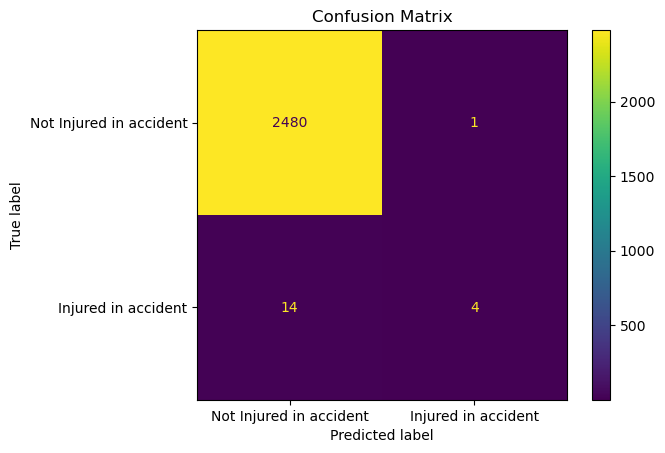

In [50]:
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Make predictions
y_pred = clf_xgb.predict(X_test)

# Step 2: Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Displaying confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=(['Not Injured in accident', 
                                               "Injured in accident"]))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9939975990396158
Precision: 0.8
Recall: 0.2222222222222222


## In the confusion matrix above we see that out of 2481 people, 2427 who were not injured in an accident (99.3%) were correctly classified.

## And out of 18 people who were injured in the accident, 4 people (22.2%) were correctly classified. 

## out of 18 poeple, 14 people were classified wrong by our model 
## This tells us that our false negative is really high.

## Such that we get to know that XGBoost model is not doing a better job...

### ####Part of our problem is that our data is imbalanced, which we saw earlier and we see this in the confusion matrix with the TOP ROW showing 2481 "people who were not injured in the accident"                                                                                                                 & BOTTOM ROW showing that 18 "people who were injured in the accident"####


### Because of this imbalance our model is not able to learn properly and as a matter of fact people who are injured in accident are getting predicted "not injured" is very risky, and it can endager someone life._

## _TO RESOLVE THIS IMBALANCE WE WILL TAKE HELP OF "SCALE_POS_WEIGHT" XGBoost parameter which will help in imbalance of this dataset_
    Basically it adds a penalty for incorrectly classifying minorty class (OUR CASE IS PEOPLE WHO ARE INJURED IN THE ACCIDENT)

## _On top of that We will try to improve predictions using Cross Validation to optmize parameters__


# OPTIMIZING Parameters using Cross Validation and GridSearch()

    Hyperparmeters:-
        - max_depth: The maximum tree depth.
        - learning_rate: eta(e) 
        - gamma: The parameter which encourages prunning for trees.
        - reg_lambda - Regularization parameter, which occurs while calculating similarity score.
        
        
## Using GridSearchCV() , because it will test all the possible combinations of the parameter for us.

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
#Out of 7497 values, 56 values are 1 (+ve), and 7441 values are 0
# To find our scale_pos_weight
7441/56

132.875

In [54]:
sum(y_train)

56

#ROUND 1:
# selecting parameters


param_grid ={
    'max_depth': [6,8,7],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 5.0],
    'scale_pos_weight': [133, 140, 150]


}

In [55]:
#ROUND 2:
# selecting parameters


param_grid ={
    'max_depth': [8],
    'learning_rate': [0.6,0.3],
    'gamma': [0.09],
    'reg_lambda': [0.1, 0.2,0.3, 0.4, 0.5, 0.6],
    'scale_pos_weight': [132, 133, 134, 135, 136, 140]

}


In [56]:
#Crreating xgBoost model with respect to our grid search parameters
from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(
estimator = xgb.XGBClassifier(objective='binary:logistic', 
                             seed = 42, 
                             subsample=0.9, 
                             colsample_bytree=0.5),
    param_grid = param_grid,
    scoring ='roc_auc',
    verbose =0,
    n_jobs = 10, 
    cv=3)

In [57]:
#Fitting our model on training set 
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds = 10,
                  eval_metric ='auc', 
                  eval_set=[(X_test, y_test)],
                  verbose = False)


print(optimal_params.best_params_)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

{'gamma': 0.09, 'learning_rate': 0.3, 'max_depth': 8, 'reg_lambda': 0.6, 'scale_pos_weight': 132}


{'gamma': 0.09, 'learning_rate': 0.3, 'max_depth': 8, 'reg_lambda': 0.6, 'scale_pos_weight': 132}


# After testing all possibilities of the potential parameter values with the help of cross validation, we see that we should get 
## 'max_depth': [8],
## 'learning_rate': [0.3],
## 'gamma': [0.09],
## 'reg_lambda': [0.6],
## 'scale_pos_weight': [132]

# Building, Evaluating, Drawing and interpreting the optimized XGBoost Model

In [58]:
clf_xgb_2 = xgb.XGBClassifier(seed =42,
                             objective='binary:logistic',
                             gamma = 0.09,
                              learning_rate=0.3,
                              max_depth=8,
                              reg_lambda = 0.6,
                              scale_pos_weight = 132,
                              subsample=0.9,
                              colsample_bytree=0.5, 
                              n_estimators=100,
                              verbosity=1,
                              base_score=0.5, 
                              booster='gbtree',
                              random_state=0,
                              silent = False,
                              n_thread=None, 
                              min_child_weight=1, 
                              max_delta_step=0, 
                              colsample_bylevel=1,
                              colsample_bynode=1,
                              n_jobs=1)
                             

clf_xgb_2.fit(X_train, 
             y_train, 
             early_stopping_rounds=10,
             eval_metric = 'aucpr',
             eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.08580
[1]	validation_0-aucpr:0.11058
[2]	validation_0-aucpr:0.12735
[3]	validation_0-aucpr:0.26626
[4]	validation_0-aucpr:0.39245
[5]	validation_0-aucpr:0.39582
[6]	validation_0-aucpr:0.42066
[7]	validation_0-aucpr:0.41209
[8]	validation_0-aucpr:0.42082
[9]	validation_0-aucpr:0.41728
[10]	validation_0-aucpr:0.43735
[11]	validation_0-aucpr:0.41961
[12]	validation_0-aucpr:0.43899
[13]	validation_0-aucpr:0.45485
[14]	validation_0-aucpr:0.38486
[15]	validation_0-aucpr:0.36642
[16]	validation_0-aucpr:0.36170
[17]	validation_0-aucpr:0.36810
[18]	validation_0-aucpr:0.35252
[19]	validation_0-aucpr:0.36697
[20]	validation_0-aucpr:0.37054
[21]	validation_0-aucpr:0.37118
[22]	validation_0-aucpr:0.37777
[23]	validation_0-aucpr:0.43060


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.09,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=8, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, n_thread=None, num_parallel_tree=None, ...)

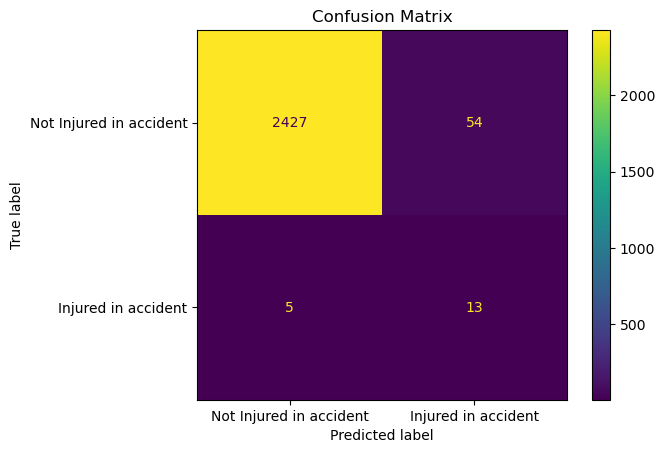

In [59]:
# Step 1: Make predictions
y_pred_2 = clf_xgb_2.predict(X_test)

# Step 2: Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

# Step 3: Displaying confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=(['Not Injured in accident', 
                                               "Injured in accident"]))
disp.plot() 
plt.title('Confusion Matrix')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.976390556222489
Precision: 0.19402985074626866
Recall: 0.7222222222222222


## In the confusion matrix above we see that out of 2481 people, 2427 who were not injured in an accident (97.6%) were correctly classified.

## And out of 18 people who were injured in the accident, 13 people (72.2%) were correctly classified. 

## Out of 18 poeple, 5 people were classified wrong by our model 
## This tells us that our false negative is now low after finding the right hyperparameters for our XGBoost Model)

## Such that we get to know that XGBoost model is now doing a better job as compared to our last clf_xgb model....



# _We will try to tune more parameters to get our Precisions better than what we have right now in clf_xgb_2_

# ROUND 3

In [61]:
#ROUND 3:
# selecting parameters

#->ROUND 3: It was divided into "four parts"=
    #part1 was to find perfect "n_estimators"
    #part2 was to find perfect "subsample"
    #part3 was to find perfect "colsample_bylevel"
    #part4 was to find perfect "colsample_bynode"
    
    


param_grid ={
    'max_depth': [8],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'gamma': [0.09],
    'reg_lambda': [0.6],
    'scale_pos_weight': [132],
    'subsample' :[0.9],
    'colsample_bytress' : [0.5],
    'n_estimators' :[100],
    'colsample_bylevel':[0.6],
    'colsample_bynode':[0.6], 
    
    
    
}

ROUND #3 first part GAVE ME THESE PARAMETERS: 
{'colsample_bytress': 0.5, 'gamma': 0.09, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100, 'reg_lambda': 0.6, 'scale_pos_weight': 132, 'subsample': 0.9}


ROUND #4 Second part GAVE ME THESE PARAMETERS:
{'colsample_bylevel': 0.6, 'colsample_bynode': 0.6, 'colsample_bytress': 0.5, 'gamma': 0.09, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100, 'reg_lambda': 0.6, 'scale_pos_weight': 132, 'subsample': 0.9}

In [62]:
#Crreating xgBoost model with respect to our grid search parameters
from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(
estimator = xgb.XGBClassifier(objective='binary:logistic', 
                             seed = 42),
    param_grid = param_grid,
    scoring ='roc_auc',
    verbose =0,
    n_jobs = 10, 
    cv=3)

In [63]:
#Fitting our model on training set 
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds = 10,
                  eval_metric ='auc', 
                  eval_set=[(X_test, y_test)],
                  verbose = False)


print(optimal_params.best_params_)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  war

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [14:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytress" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [14:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytress" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [14:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytress" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [14:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytress" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

{'colsample_bylevel': 0.6, 'colsample_bynode': 0.6, 'colsample_bytress': 0.5, 'gamma': 0.09, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100, 'reg_lambda': 0.6, 'scale_pos_weight': 132, 'subsample': 0.9}


{'colsample_bylevel': 0.6, 'colsample_bytress': 0.5, 'gamma': 0.09, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100, 'reg_lambda': 0.6, 'scale_pos_weight': 132, 'subsample': 0.9}

# After round 3, Below are the parameters that I was able to find.
    ## {'colsample_bylevel': 0.6, 'colsample_bytress': 0.5, 'gamma': 0.09, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100, 'reg_lambda': 0.6, 'scale_pos_weight': 132, 'subsample': 0.9}

### FOR the learning rate I am choosing 0.1 and optimal 0.3 because 
##### Setting the learning rate to 0.1 means that for each iteration of boosting, the model will only correct the predictions by 10% of the residual error from the previous iteration. So, with a lower learning rate, the model learns more slowly and cautiously, but it's also less likely to overshoot the optimal solution.

In [64]:
clf_xgb_3 = xgb.XGBClassifier(seed =42,
                             objective='binary:logistic',
                             gamma = 0.09,
                              learning_rate=0.1,
                              max_depth=8,
                              reg_lambda = 0.6,
                              scale_pos_weight = 132,
                              subsample=0.9,
                              colsample_bytree=0.5, 
                              n_estimators=100,
                              verbosity=1,
                              base_score=0.5, 
                              booster='gbtree',
                              random_state=0,
                              silent = False,
                              n_thread=None, 
                              min_child_weight=1, 
                              max_delta_step=0, 
                              colsample_bylevel=0.6,
                              colsample_bynode=0.6,
                              n_jobs=1)
                             

clf_xgb_3.fit(X_train, 
             y_train, 
             early_stopping_rounds=10,
             eval_metric = 'aucpr',
             eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.39429
[1]	validation_0-aucpr:0.33754
[2]	validation_0-aucpr:0.35571
[3]	validation_0-aucpr:0.35525
[4]	validation_0-aucpr:0.30564
[5]	validation_0-aucpr:0.24904
[6]	validation_0-aucpr:0.42321
[7]	validation_0-aucpr:0.38743
[8]	validation_0-aucpr:0.38585
[9]	validation_0-aucpr:0.31605
[10]	validation_0-aucpr:0.35214
[11]	validation_0-aucpr:0.38444
[12]	validation_0-aucpr:0.41643
[13]	validation_0-aucpr:0.41895
[14]	validation_0-aucpr:0.42039
[15]	validation_0-aucpr:0.38710
[16]	validation_0-aucpr:0.39641


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.6, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.09,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=8, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, n_thread=None, num_parallel_tree=None, ...)

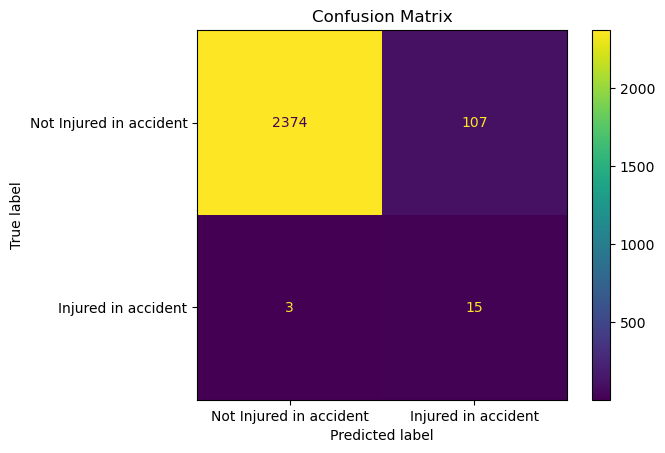

In [65]:
# Step 1: Make predictions
y_pred_3 = clf_xgb_3.predict(X_test)

# Step 2: Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_3)

# Step 3: Displaying confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=(['Not Injured in accident', 
                                               "Injured in accident"]))
disp.plot() 
plt.title('Confusion Matrix')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred_3)
precision = precision_score(y_test, y_pred_3)
recall = recall_score(y_test, y_pred_3)
f1_score = 2 * (precision * recall) / (precision + recall)


# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)


Accuracy: 0.9559823929571829
Precision: 0.12295081967213115
Recall: 0.8333333333333334
F1_Score: 0.21428571428571427


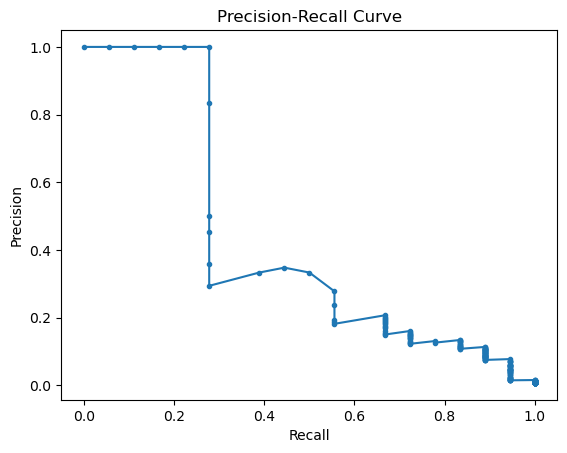

In [68]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_scores contains the predicted probabilities for class 1
y_scores = clf_xgb_3.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#Lookinf at the right-hand side of the PR curve where recall is high (close to 1). 

#In these regions, the model is identifying most of the positive cases, which means fewer false negatives.
#However, high recall often comes with a trade-off of lower precision, which means more false positives.


## In the confusion matrix above we see that out of 2481 people, 2374 who were not injured in an accident (96.3%) were correctly classified.

## And out of 18 people who were injured in the accident, 15 people (83.3%) were correctly classified. 

## out of 18 poeple, only 3 people were classified wrong by our model 
## This tells us that our false negative is now low after finding the right hyperparameters for our XGBoost Model)

## Such that we get to know that XGBoost model is now doing a better job as compared to our last clf_xgb_2 model....



# FINAL WORD

- From our last model we can conclude that we  are getting better results for our false negative ("injured and predicting injured"), which is the key player for our prediction. 

- But to achieve a better nummber for that we did sacrificed our True positive ("not injured and predicting not injured") and False positive ("not injured and predicting injured ") which is why our accuracy fell down to 95%.

- But looking at realistic picture we want less False negative, because in an accident situation we want our model to send right information to medic and cops that people innvolved in the accident are injured. as compared to not injured and still getting predicted as Injured.

conda install graphviz python-graphviz

# Printing out the "first tree" of XGBoost Model.

In [69]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

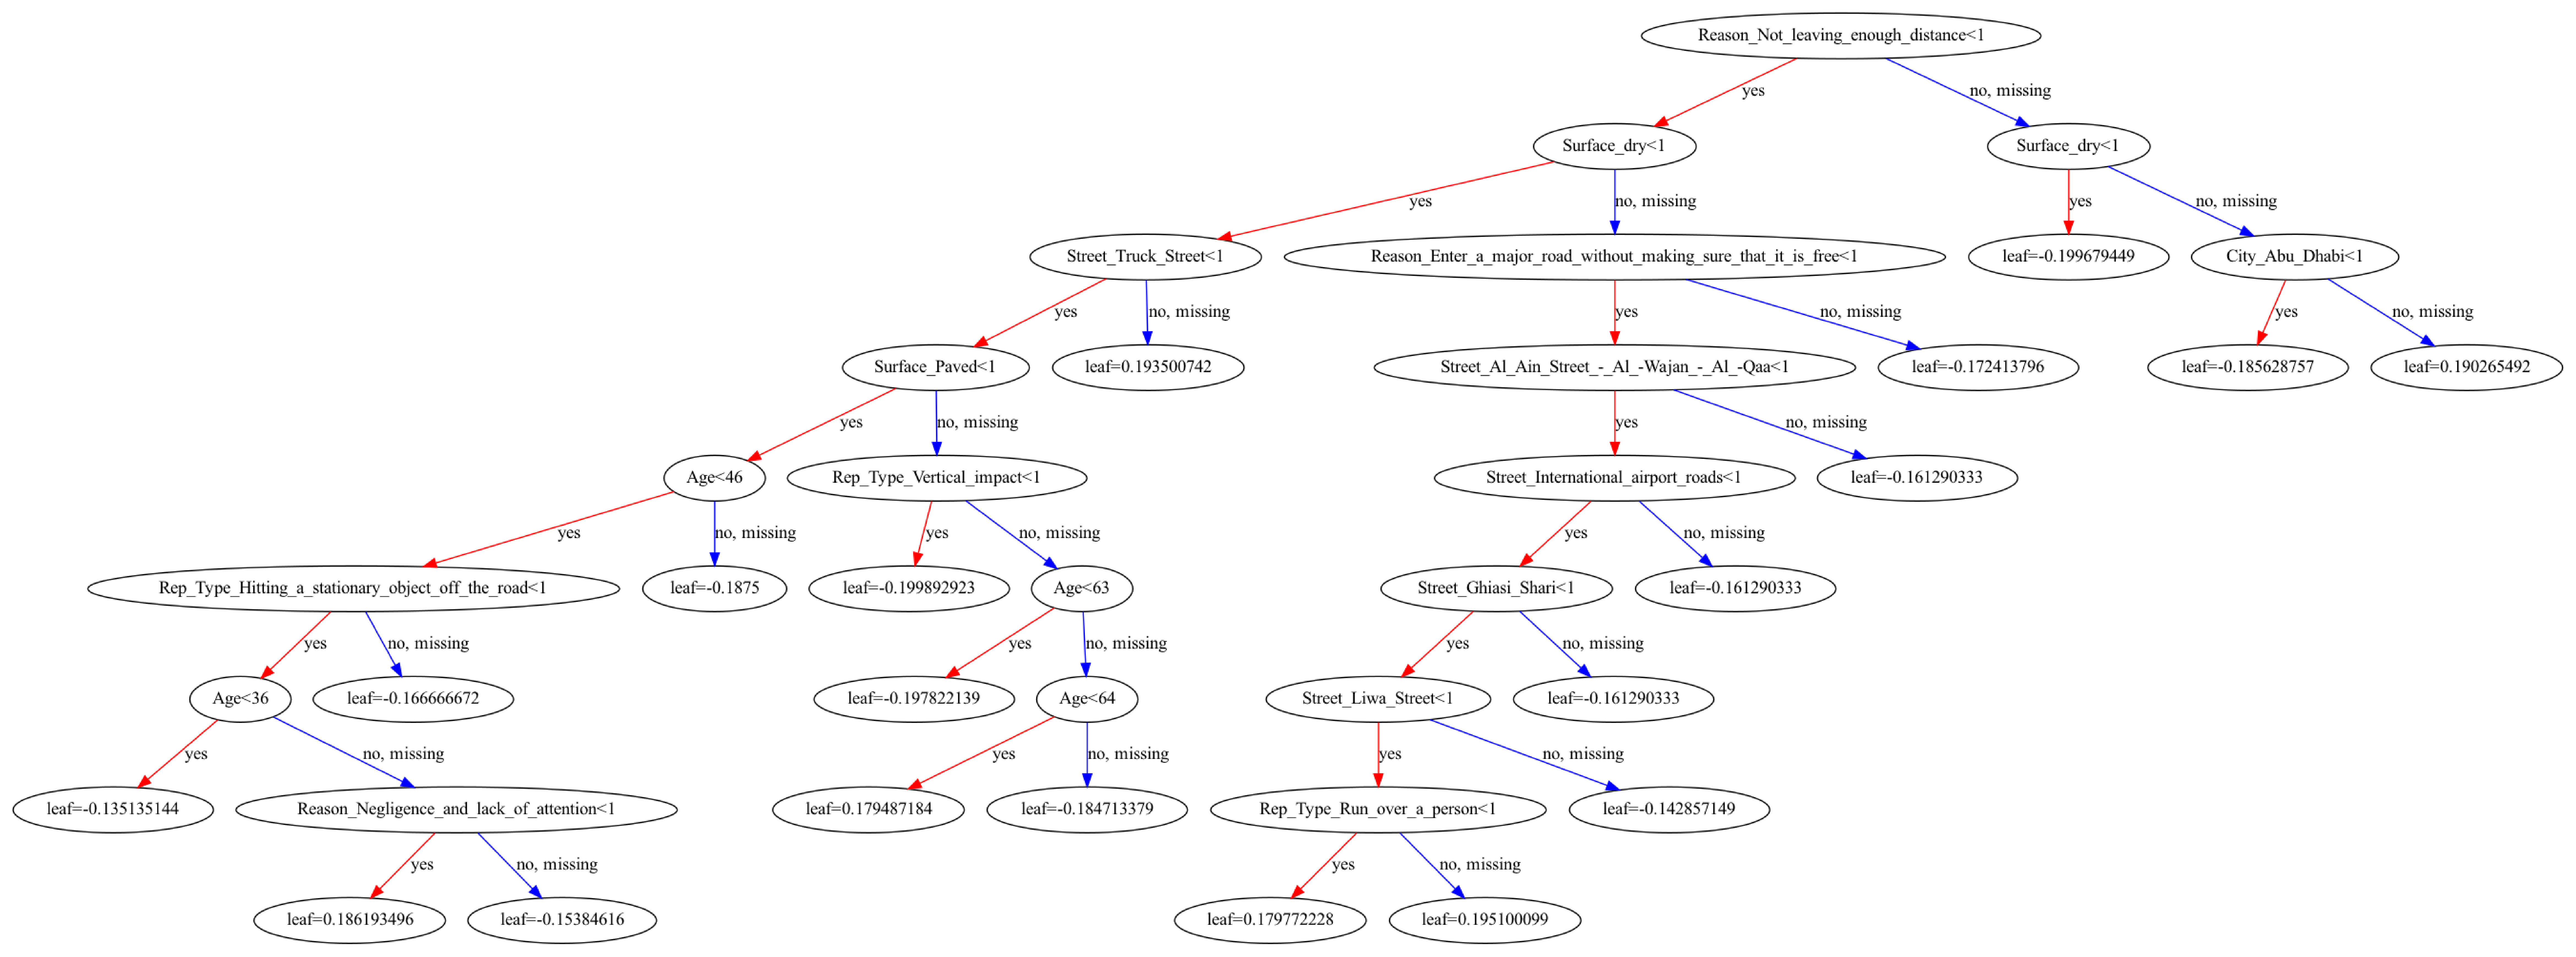

In [70]:
import matplotlib.pyplot as plt
import matplotlib
from xgboost import plot_tree

# Increase DPI for higher resolution
matplotlib.rcParams['figure.dpi'] = 300  # Adjust as needed

# Plot the first tree
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(clf_xgb_3, ax=ax, num_trees=0)
plt.show()

# Printing out the "Best tree" of XGBoost Model.

<Figure size 12000x12000 with 0 Axes>

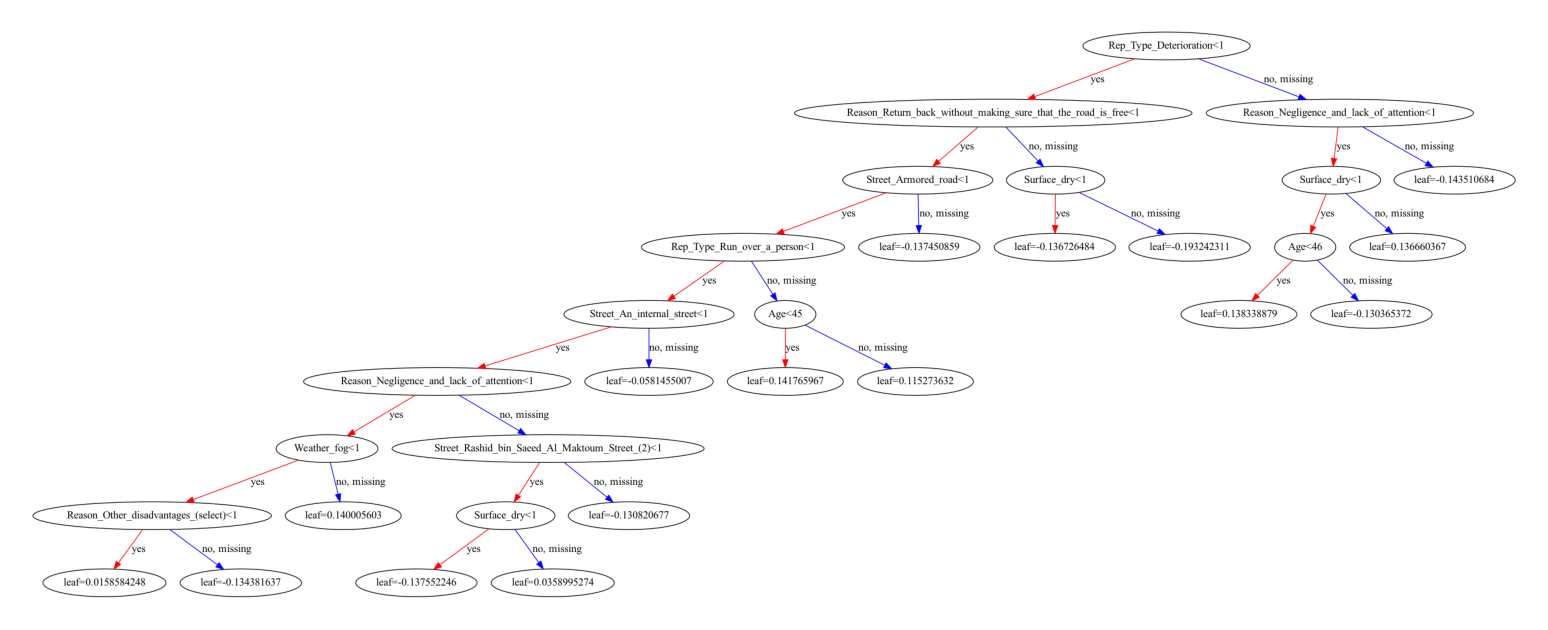

In [71]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Get the best tree index based on performance metrics or CV
best_tree_index = clf_xgb_3.best_iteration

# Increase DPI and figsize for better quality
plt.figure(figsize=(40, 40), dpi=300)

# Plot the best tree
plot_tree(clf_xgb_3, num_trees=best_tree_index)
plt.show()
